***Question 1***
---


In [16]:
import pandas as pd 
import plotly.express as px
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

fig = px.histogram(pingees, x = 'flipper_length_mm')
fig.show(render = 'png')

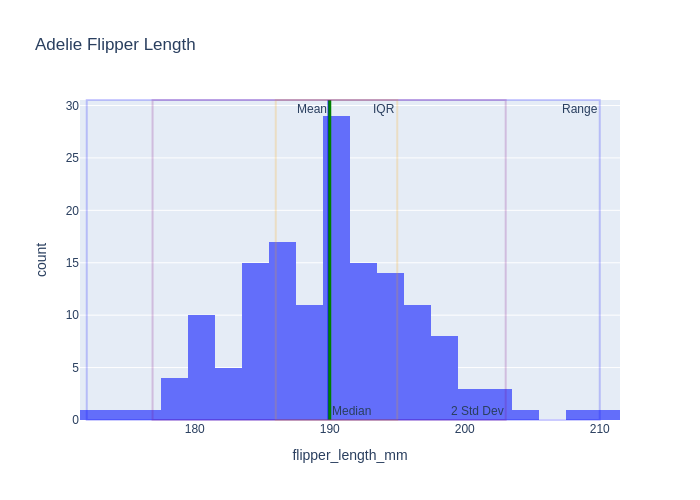

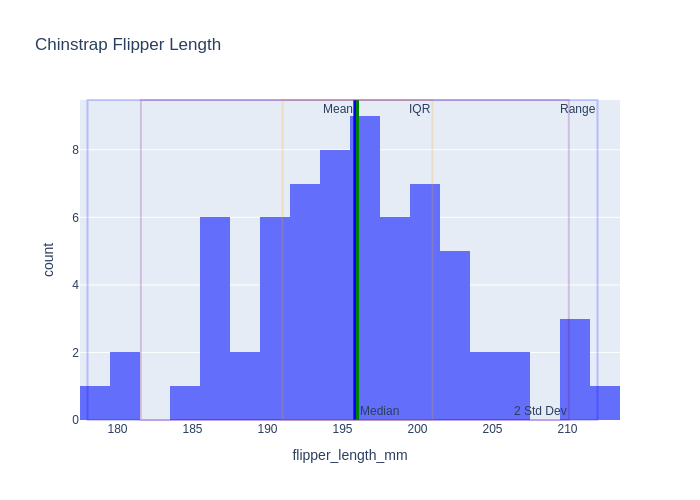

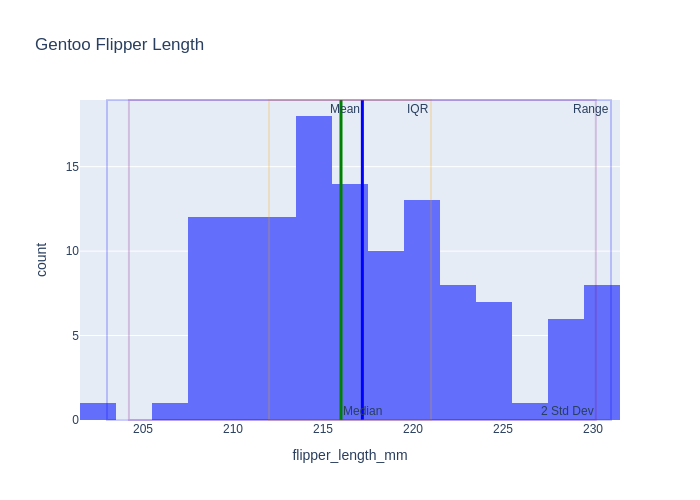

In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load penguins dataset (replace with the correct path or method)
# Assuming you have the dataset as a CSV or similar format
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")


# Separate by species
species_list = df['species'].unique()

# Loop through each species
for species in species_list:
    species_df = df[df['species'] == species]
    
    # Calculate statistics
    mean_flipper = species_df['flipper_length_mm'].mean()
    median_flipper = species_df['flipper_length_mm'].median()
    min_flipper = species_df['flipper_length_mm'].min()
    max_flipper = species_df['flipper_length_mm'].max()
    std_flipper = species_df['flipper_length_mm'].std()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)
    
    # Create histogram
    fig = px.histogram(species_df, x='flipper_length_mm', nbins=20, title=f'{species} Flipper Length')

    # Mark Location: Add vertical lines for mean and median
    fig.add_vline(x=mean_flipper, line=dict(color="blue", width=3), annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median_flipper, line=dict(color="green", width=3), annotation_text="Median", annotation_position="bottom right")

    # Mark Scale: Add rectangles for range, IQR, and two standard deviations
    # Range (min to max)
    fig.add_vrect(x0=min_flipper, x1=max_flipper, line=dict(color="blue", width=2), opacity=0.2, annotation_text="Range", annotation_position="top right")
    
    # IQR (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, line=dict(color="orange", width=2), opacity=0.2, annotation_text="IQR", annotation_position="top right")
    
    # 2 Standard Deviations from the mean
    fig.add_vrect(x0=mean_flipper - 2 * std_flipper, x1=mean_flipper + 2 * std_flipper, line=dict(color="purple", width=2), opacity=0.2, annotation_text="2 Std Dev", annotation_position="bottom right")

    # Show the plot
    fig.show(renderer = 'png')


**ChatGPT Chat Summary**
Here’s a brief summary of our conversation so far:

- You were tasked with marking **location** (mean, median) and **scale** (range, IQR, two standard deviations) of `flipper_length_mm` for each species in the penguins dataset on **Plotly histograms**.
- We discussed how to:
  - Use `add_vline()` for the **mean** and **median**.
  - Use `add_vrect()` for the **range**, **IQR**, and the **± 2 standard deviations** range.
- You encountered issues with the **labels overlapping** for the mean and median. I suggested adjusting `annotation_position` to avoid this overlap by placing the labels in different positions (e.g., "top left" and "top right").
  
Let me know if you need any further clarifications!

link: https://chatgpt.com/share/66ef4382-6d1c-800d-bc66-0e597b7183be

***Question 2***
---

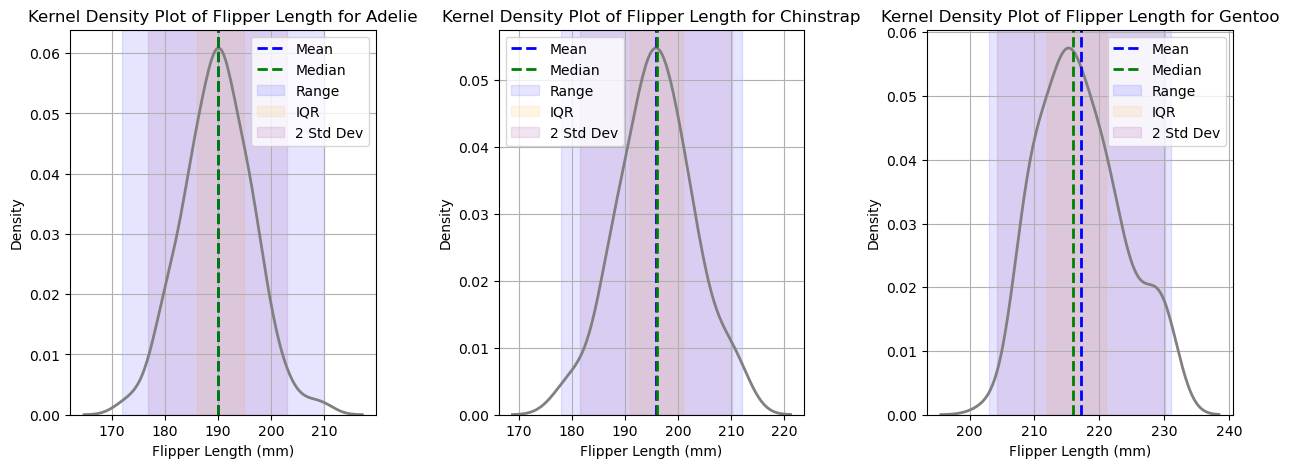

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load penguins dataset (replace with the correct path)
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Separate by species
species_list = df['species'].unique()

# Set up the number of rows and columns for subplots
num_plots = len(species_list)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate required rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Loop through each species and create a KDE plot
for i, species in enumerate(species_list):
    species_df = df[df['species'] == species]
    
    # Calculate statistics
    mean_flipper = species_df['flipper_length_mm'].mean()
    median_flipper = species_df['flipper_length_mm'].median()
    min_flipper = species_df['flipper_length_mm'].min()
    max_flipper = species_df['flipper_length_mm'].max()
    std_flipper = species_df['flipper_length_mm'].std()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)

    # Create KDE plot without fill on the corresponding axis
    sns.kdeplot(species_df['flipper_length_mm'], color='gray', linewidth=2, ax=axes[i])

    # Add vertical lines for mean and median
    axes[i].axvline(mean_flipper, color='blue', linestyle='--', linewidth=2, label='Mean')
    axes[i].axvline(median_flipper, color='green', linestyle='--', linewidth=2, label='Median')

    # Add shaded areas for range, IQR, and two standard deviations
    axes[i].axvspan(min_flipper, max_flipper, color='blue', alpha=0.1, label='Range')
    axes[i].axvspan(q1, q3, color='orange', alpha=0.1, label='IQR')
    axes[i].axvspan(mean_flipper - 2 * std_flipper, mean_flipper + 2 * std_flipper, color='purple', alpha=0.1, label='2 Std Dev')

    # Set titles and labels
    axes[i].set_title(f'Kernel Density Plot of Flipper Length for {species}')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout with more space between graphs
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust these values as needed

# Render the plot inline in the notebook without saving to a file
plt.show()

***ChatGPT Chat Summary***
Here’s a summary of our conversation:

1. **Kernel Density Diagrams**: You asked about kernel density diagrams, and I explained their purpose and how they differ from histograms.

2. **KDE Plots for Penguins Dataset**: We discussed how to create kernel density estimation (KDE) plots for the penguins dataset to visualize `flipper_length_mm` while marking key statistics (mean, median, range, IQR, and ±2 standard deviations).

3. **Plot Adjustments**: You requested modifications to remove fill color in the KDE plots and organize the plots in rows of three.

4. **Spacing Between Plots**: You asked for increased spacing between the subplots, and I provided code to adjust the layout for better visual separation.

If you need anything else or have further questions, feel free to ask!

link: https://chatgpt.com/share/66ef4382-6d1c-800d-bc66-0e597b7183be

***Question 3***
---
Of the three data types, I personally prefer kernel density diagrams because it displays the shape, density, and distribution of the data the best. While box plots, are good for creating a summary of the data, it does not show the shape of the data distribution. It is impossible to tell if a dataset is modal or bimodal through its box and whisker graph. Kernel density diagrams on the other hand clearly show the shape of the data distribution. Histograms can be seen as a bar graph alternative for continuous data sets. But while histograms show frequency counts, kernel density diagrams show the probability density. This is an advantage because it allows us to calculate the probability of a value being within a exact range. One downside of kernel density diagrams, is that fine details in the data are obscured by the smoothness of the curve. 

***ChatGPT Chat Summary***
In this discussion, we compared **histograms**, **kernel density diagrams (KDE plots)**, and **box plots** by refining your initial explanation and analyzing the **pros and cons** of each type of data visualization. We highlighted how histograms display frequency counts of data within bins, while KDE plots offer a smoother view of the data’s **probability density**, better capturing the shape and modality of the distribution. Box plots were noted for their ability to summarize data through quartiles and outliers, but they don’t provide detailed insights into the distribution’s shape.

We also explored **why probability density** (as used in KDE plots) can be more informative than frequency (in histograms). Key reasons included better normalization across different sample sizes, easier interpretation of distribution shapes, and better handling of continuous data.

Would you like to explore any of these ideas further?
link: https://chatgpt.com/share/66f04671-24c8-800d-9145-4811ce5e7507


***Question 4***
---


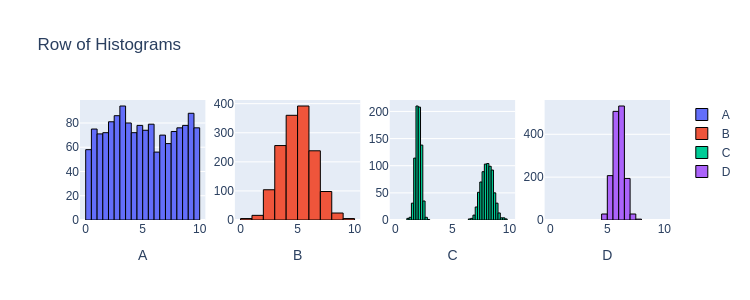

5.030617050586211 4.996155985053012 5.028197324225104 6.003897015146594
8.244705779086662 2.1173862938578005 9.267932739736686 0.23657784493223807


In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)
fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer = 'png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

print(data1.mean(), data2.mean(), data3.mean(), data4.mean())
print(data1.var(), data2.var(), data3.var(), data4.var())

**Graphs with similair means** - Graphs A, B, and C have similair means. The mean is the sum of the values of all data points divided by the number of data points. Graph A has an equal distribution of values from 0 to 10, so if you summed all those values and divided by the number of values you would get a mean close to 5. Graph B has a high concentration of values at 5, and because it is symetric the values on the two sides of the peak will average out to 5, resulting in a mean of 5. Graph C has an equal concentration of values to the right of 5 and to the left of 5. Those values are equidistant from 5, resulting in a mean of 5. Graph D has a high concentration of values to the right of 5, resulting in a mean greater than 5.

**Graphs with similair variances** - The variance is a calculation of how spread apart the data is, or the average distance of each value point from the mean.  Graphs A and C have similair variances, as most values in both graphs are pretty far from the mean. Graphs B and D have different variances as the concentration of values in graph B is more spread out when compared to graph D. 

1. From the explanation above, graphs A and C have similair mean and variance.
2. Graphs B and A have similair means but different variances. Graphs B and C have similair means but different variances. 
3. None of the graphs have similair variances but different means as justified above. 
4. Graphs B and D have different means and different variances. 


***Question 5***
---


In a perfectly symmetrical histogram the mean and median would be the same value. In a histogram that has a right skew (values trailing to the right), the mean would be greater than the median. This is because even though there are equal number of data points on the right and left, the value of the data points on the right are very high and pull the mean to the right.  

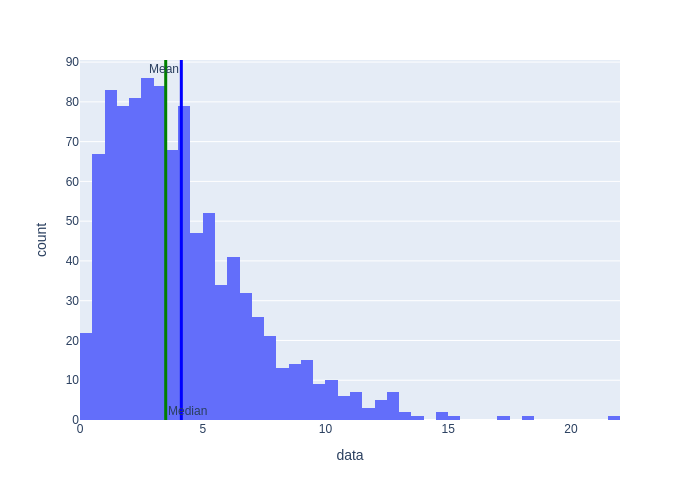

Mean: 4.128364971860998, Median: 3.4918008961007176


In [13]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate the gamma-distributed data
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create the histogram
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

# Calculate the mean and median
mean1 = sample1.mean()  # Calculating the mean
median1 = np.median(sample1)  # Calculating the median

# Add vertical lines for the mean and median
fig1.add_vline(x=mean1, line=dict(color="blue", width=3), annotation_text="Mean", annotation_position="top left")
fig1.add_vline(x=median1, line=dict(color="green", width=3), annotation_text="Median", annotation_position="bottom right")

# Display the plot with the added mean and median lines
fig1.show(renderer="png")

# Mean and median values
print(f"Mean: {mean1}, Median: {median1}")

# Generate negatively skewed data for the second sample
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)


When the graph is left skew then the mean is less than the median because the values on the left pull the mean towards the left. 

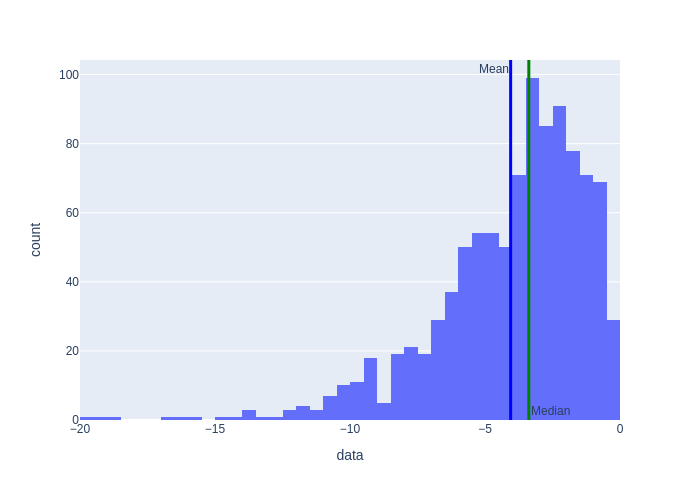

Sample 1 - Mean: 4.128364971860998, Median: 3.4918008961007176
Sample 2 - Mean: -4.0503552021471965, Median: -3.3770787686589365


In [14]:
# Sample 2: Negatively skewed gamma-distributed data
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create the histogram for sample 2
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

# Calculate mean and median for sample 2
mean2 = sample2.mean()  # Mean
median2 = np.median(sample2)  # Median

# Add vertical lines for mean and median in sample 2
fig2.add_vline(x=mean2, line=dict(color="blue", width=3), annotation_text="Mean", annotation_position="top left")
fig2.add_vline(x=median2, line=dict(color="green", width=3), annotation_text="Median", annotation_position="bottom right")

# Display the plot for sample 2
fig2.show(renderer="png")

# Print the means and medians for both samples
print(f"Sample 1 - Mean: {mean1}, Median: {median1}")
print(f"Sample 2 - Mean: {mean2}, Median: {median2}")



***ChatGPT Chat Summary***

Here’s a more concise explanation of working with medians in a `pandas` DataFrame:

### Finding the Median of a DataFrame

1. **Basic Median Calculation**:
   Use `df.median()` to find the median of each numerical column.

   ```python
   import pandas as pd

   data = {'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]}
   df = pd.DataFrame(data)
   median_values = df.median()
   print(median_values)  # A: 3.0, B: 30.0
   ```

2. **Median for a Specific Column**:
   To calculate the median of a single column:
   ```python
   median_A = df['A'].median()
   ```

3. **Handling Missing Values**:
   By default, `median()` skips `NaN` values:
   ```python
   df.median(skipna=True)
   ```

4. **Median Across Rows**:
   Use `axis=1` to calculate the median across rows:
   ```python
   df.median(axis=1)
   ```

5. **Grouped Data**:
   Use `groupby()` to calculate the median for each group:
   ```python
   df.groupby('Group').median()
   ```

This covers the essential use cases of calculating the median in `pandas`. Let me know if you need further details!

link: https://chatgpt.com/share/66f18dc0-3900-800d-b1b9-b3f0abbb903f

***Question 6***
---


1. Import the data set. View header of dataset and check for missing value. Clean dataset if needed. 

In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [7]:
df.head

array([1000, 2000, 3000])

Cleaning data by dropping rows with missing values. 

In [8]:
df = df.dropna()
df

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1000,108,255,10.1,510,150.0,17.0,26.0,9.0,44.0,...,80,27.0,1,4.0,64.0,12.0,15.0,0.0,40.0,8.0
256,1000,108,256,13.4,690,200.0,23.0,35.0,12.0,58.0,...,106,35.0,1,5.0,85.0,15.0,20.0,0.0,50.0,10.0
257,1000,108,257,6.7,340,100.0,11.0,17.0,6.0,29.0,...,53,18.0,1,2.0,43.0,8.0,10.0,0.0,25.0,6.0
258,1000,108,258,14.2,810,290.0,32.0,50.0,15.0,76.0,...,114,38.0,2,9.0,103.0,21.0,20.0,0.0,60.0,6.0


2. Use summary statistics to get a general understanding of the food from restaurant id 10000.  

In [10]:
df.describe()

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (% daily value),saturated fat (g),saturated fat (% daily value),trans fat (g),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
count,260.0,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,1000.0,104.711538,129.500000,12.858032,368.269231,127.096154,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,0.0,2.919357,75.199734,6.988335,240.269886,127.875914,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,1000.0,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.0,102.000000,64.750000,6.975000,210.000000,20.000000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,1000.0,106.000000,129.500000,12.000000,340.000000,100.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,1000.0,107.000000,194.250000,16.000000,500.000000,200.000000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1000.0,108.000000,259.000000,32.000000,1880.000000,1060.000000,182.000000,20.000000,102.000000,2.500000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


3. Because the data is continuous, we can use histograms and kernel density diagrams to visualize the data. 

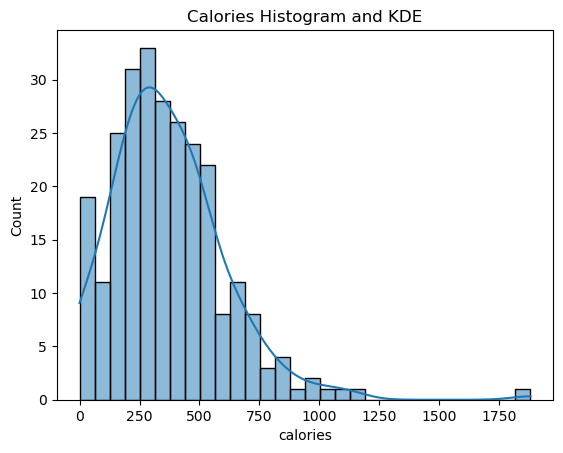

In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Plot KDE and histogram using Seaborn
sns.histplot(df, x ='calories', kde=True, bins=30)
plt.title('Calories Histogram and KDE')
# Display the plot
plt.show()

We can also graph its box plot to visualize the data summary as well as to show outliers. 

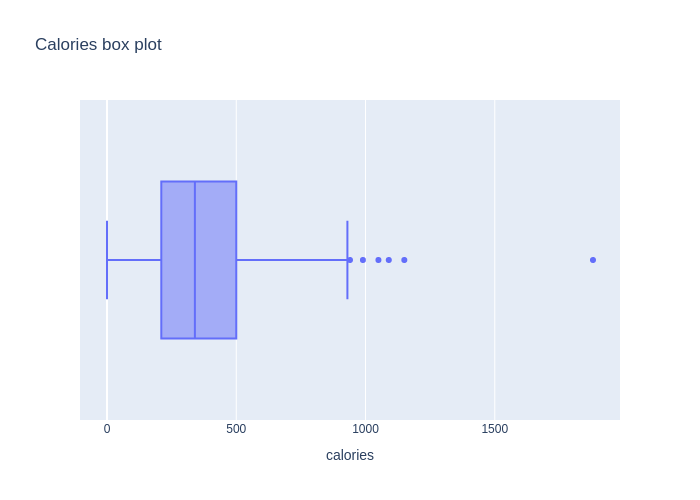

In [33]:
import plotly.express as px
fig = px.box(df, x= 'calories', title = 'Calories box plot')
fig.show(renderer = 'png')

Note that we can do this with any of the given variables and it would be helpful to do so. 

***ChatGPT Chat Summary***

Here's a summary of our chat:

1. **Kernel Density Estimation (KDE) using Plotly Express**:
   - Provided code for creating KDE plots in 1D and 2D using Plotly Express.
   - Explained how to overlay a KDE curve on a histogram using `scipy.stats.gaussian_kde` and Plotly.

2. **KDE Implementation**:
   - Offered a short, simple KDE implementation using NumPy and Matplotlib.
   - Provided a brief example using Seaborn to plot a histogram with a KDE overlay, including instructions for adding a title to the plot.

If you need more details or specific topics, let me know!

link: https://chatgpt.com/share/66f1b73e-9af8-800d-9901-9d3b772b3127

***Question 7***
---


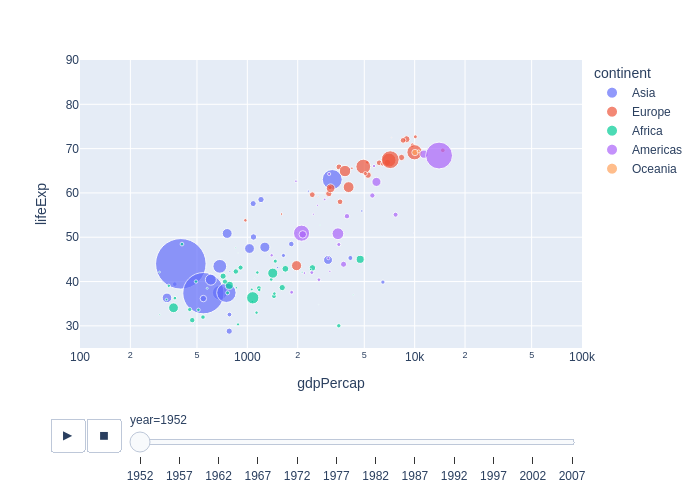

In [41]:
import plotly.express as px
import plotly.io as pio

# Set the renderer to display plots in Jupyter Notebook
pio.renderers.default = 'notebook'

# Load the Gapminder dataset
df = px.data.gapminder()

# Create the scatter plot
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, 
                 size_max=55, 
                 range_x=[100, 100000], 
                 range_y=[25, 90])

# Show the figure
fig.show()


***ChatGPT chat summary***

You asked about a code snippet using Plotly Express to create an animated scatter plot from the Gapminder dataset. I explained its components, including axes, animation, sizing, and coloring. You then inquired why it wasn't rendering in JupyterHub, and I suggested checking the Plotly installation, enabling notebook mode, and using the `show` method. Finally, I provided a complete code snippet to ensure proper rendering in JupyterHub.

link: https://chatgpt.com/share/66f1ba37-be6c-800d-8962-771ba09aa4bb

***Question 8***
---


In [43]:

# Load the Gapminder dataset
df = px.data.gapminder()

# Create the scatter plot
fig = px.scatter(df, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="country",
                 size="percent", 
                 color="sex", 
                 hover_name="name",
                 log_x=True, 
                 size_max=50, 
                 range_x=[-0.005, 0.005], 
                 range_y=[25, 90])

# Show the figure
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num'] but received: rank